In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics
from sklearn import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, roc_auc_score, f1_score, make_scorer
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

In [3]:
df = pd.read_csv('C:\IDE\Math trees\Module 3\data\CC GENERAL.csv')

<>:1: SyntaxWarning: "\I" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\I"? A raw string is also an option.
<>:1: SyntaxWarning: "\I" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\I"? A raw string is also an option.
C:\Users\troyd\AppData\Local\Temp\ipykernel_13680\3268245134.py:1: SyntaxWarning: "\I" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\I"? A raw string is also an option.
  df = pd.read_csv('C:\IDE\Math trees\Module 3\data\CC GENERAL.csv')


In [7]:
df.isna().sum().sum()

np.int64(314)

In [4]:
df.fillna(df.mean(numeric_only=True), inplace = True)
df['MINIMUM_PAYMENTS'].mean(numeric_only=True)

np.float64(864.2065423050826)

In [5]:
X = df.copy()
X.drop('CUST_ID', axis=1, inplace=True)
scaler = StandardScaler()

X_norm = scaler.fit_transform(X)
X_norm[0][0]

np.float64(-0.7319893664465484)

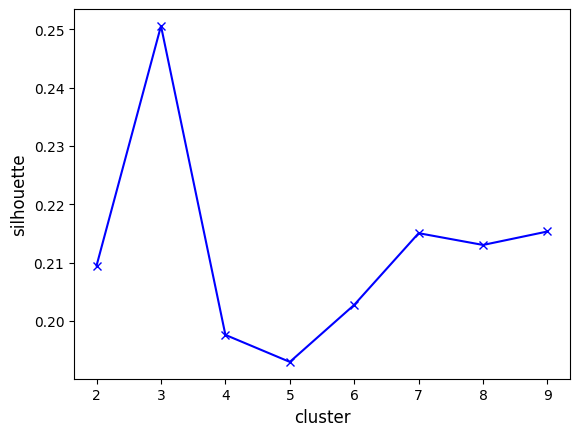

In [6]:
from sklearn.metrics import silhouette_score

def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42, init='random')
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.labels_, metric='euclidean')
    return silhouette

silhouettes = []
for i in range(2, 10):
    silhouettes.append(get_silhouette(i, X_norm))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouettes, 'xb-')

In [15]:

kmeans = KMeans(n_clusters=3, random_state=42, init='random')
kmeans.fit(X_norm)
df.loc[:, 'label'] = kmeans.labels_
df.label.value_counts().min()

np.int64(1235)

In [17]:
db = DBSCAN()
db.fit(X_norm)
clusters = db.labels_
len(set(clusters)) - (1 if -1 in clusters else 0)

38

In [18]:
siliuette_list_dbscan = []
 
for eps in np.arange(0.1,3,0.2):
    for min_sample in range(1,20,4):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(X_norm)
        sil_score = silhouette_score(X_norm, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])
df_dbscan.sort_values(by = 'sil_score')

,eps,min_samples,sil_score,number_of_clusters
11,0.5,5,-0.443701,39
16,0.7,5,-0.438837,29
6,0.3,5,-0.424475,42
7,0.3,9,-0.404209,15
30,1.3,1,-0.399305,1536
...,...,...,...,...
74,2.9,17,0.591924,2
66,2.7,5,0.592182,2
73,2.9,13,0.595399,2
72,2.9,9,0.603811,2


In [7]:
siliuette_list_hierarchical = []
 
for cluster in range(3,10,1):
        agglomerative = AgglomerativeClustering(metric='euclidean',n_clusters=cluster).fit_predict(X_norm)
        sil_score = silhouette_score(X_norm, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score,len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','number_of_clusters'])
 
 
df_hierarchical.sort_values(by = 'sil_score')

,cluster,sil_score,number_of_clusters
5,8,0.152035,8
6,9,0.153719,9
1,4,0.154709,4
4,7,0.156415,7
2,5,0.158069,5
0,3,0.173110,3
3,6,0.173356,6


In [8]:
model = AgglomerativeClustering(metric='euclidean', n_clusters=6).fit(X_norm)
df['cluster_id'] = model.labels_
df['cluster_id'].value_counts()

cluster_id
0    3946
1    2931
2     864
5     722
3     464
4      23
Name: count, dtype: int64

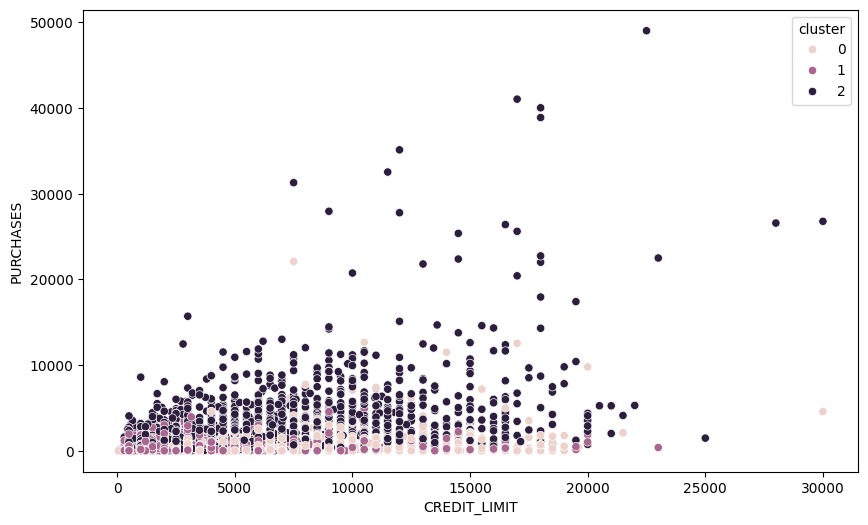

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_norm)
df['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster')
plt.show()